### Faizan Virani
### 4/3/2024
### Web Scraping - pokemon

In [9]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
import matplotlib.pyplot as plt 

### My goal for this project is to gain information on the following questions:
### What is the most common pokemon type?
### What is the least common pokemon type?
### What is the most powerful pokemon type on average?
### What is the average stat increase from max evolution to mega evolution?
### What is the average mega pokemon stat?

In [10]:
url='https://pokemondb.net/pokedex/all'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [11]:
pokemon = [ ]
totalStat = [ ]
typeTable = soup.find(class_='data-table sticky-header block-wide').tbody
for row in typeTable.find_all('tr'):
    pokemonType = row.find(attrs={'class':'cell-icon'}).text #gets pokemon type
    stat = row.find(attrs={'class':'cell-num cell-total'}).text #gets pokemon total stat
    for x in pokemonType.split(' '):
        pokemon.append(x)
        if len(x) > 2:
            totalStat.append(stat)
        
pokemon = list(filter(None, pokemon))
print(len(pokemon))
print(len(totalStat))
pokemonTypeDF = pd.DataFrame({'Type': pokemon, 'Stat total' : totalStat}) #df
print(pokemonTypeDF)

1884
1884
        Type Stat total
0      Grass        318
1     Poison        318
2      Grass        405
3     Poison        405
4      Grass        525
...      ...        ...
1879  Normal        450
1880  Normal        600
1881  Normal        700
1882  Poison        600
1883   Ghost        600

[1884 rows x 2 columns]


### Type and stat were successfully grabbed

<BarContainer object of 18 artists>

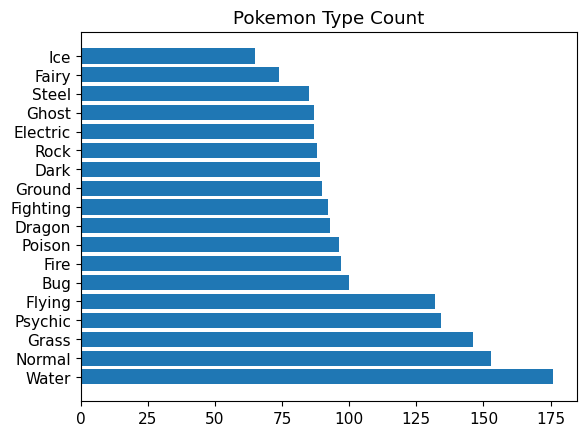

In [12]:
pokemonTypeDF['Type'].value_counts()
df = pokemonTypeDF['Type'].value_counts().rename_axis('unique_values').reset_index(name='counts') #secondary DF to make data grabbing easier

plt.rcParams['font.size'] = 11
plt.title('Pokemon Type Count') # Create title
impacts = list(df['unique_values'])
values = list(df['counts'])
plt.barh(impacts, values) # Graph

## The above graph answers two of our questions:
### - Water is the most common pokemon type
### - Ice is the least common pokemon type

C:\Users\lolgl\AppData\Local\Temp\ipykernel_23880\2514481464.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  updatedDict[key] = value/float(df[df['unique_values'] == key]['counts'])


<BarContainer object of 18 artists>

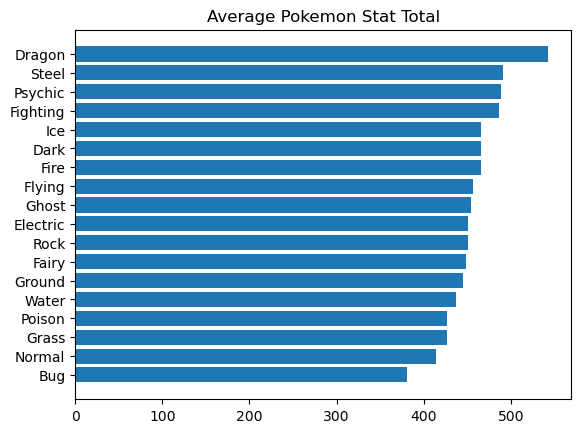

In [13]:
typeStat = {}
for row in pokemonTypeDF.index: #Gets stat total of all pokemon
    if pokemonTypeDF['Type'][row] not in typeStat:
        typeStat[pokemonTypeDF['Type'][row]] = int(pokemonTypeDF['Stat total'][row])
    else:
        typeStat[pokemonTypeDF['Type'][row]] = int(typeStat[pokemonTypeDF['Type'][row]]) + int(pokemonTypeDF['Stat total'][row])

updatedDict = {}
for key, value in typeStat.items(): #Divides to get average
    updatedDict[key] = value/float(df[df['unique_values'] == key]['counts'])
    
plt.rcParams['font.size'] = 10
plt.title('Average Pokemon Stat Total') # Create title

updatedDict = dict(sorted(updatedDict.items(), key=lambda item: item[1])) # Sort
impacts = list(updatedDict.keys())
values = list(updatedDict.values())
plt.barh(impacts, values) # Graph

## The above graph informs us that dragon type pokemon are the strongest on average

In [14]:
urls = []
for row in typeTable.find_all('tr'):
    pokemonName = row.find(attrs={'class':'cell-name'}).text
    if 'Mega ' in pokemonName:
        megaPokemonURL = row.find(attrs={'class':'ent-name'}).get('href') #Get ref URLs
        urls.append("https://pokemondb.net" + megaPokemonURL)
    
urls = list(set(urls))

In [15]:
maxEvolutionStat = [ ]
megaPokemonStat = [ ]

for url in urls:
    response = requests.get(url.strip())
    status = response.status_code
    if status == 200:
        page = response.text
        soup = bs(page)
        pokemonStatTotal = soup.find_all(attrs={'class':'cell-num cell-total'}) #Gets stats of max and mega pokemon
        megaPokemonStat.append(int(pokemonStatTotal[1:2][0].text))
        maxEvolutionStat.append(int(pokemonStatTotal[0:1][0].text))

pokemonURL = list(filter(None, urls))
mps = list(filter(None, megaPokemonStat))
mes = list(filter(None, maxEvolutionStat))
pokemonStatDF = pd.DataFrame({'Pokemon': pokemonURL, 'Max Evolution' : mes, 'Mega Evolution' : mps}) #Make DF

megaStats = 0
for num in pokemonStatDF.get('Mega Evolution'): #Mega Evolution stat avg
    megaStats = megaStats + num
    
statChange = 0
for i in range(len(mps)):
    statChange = statChange + (mps[i] - mes[i])

print(pokemonStatDF)
print("\nAverage Mega Pokemon Stat Total: " + str(megaStats/len(mps)))
print("Average Stat Change From Max to Mega Evolution: " + str(statChange/len(mps)))

                                     Pokemon  Max Evolution  Mega Evolution
0       https://pokemondb.net/pokedex/pinsir            500             600
1     https://pokemondb.net/pokedex/beedrill            395             495
2       https://pokemondb.net/pokedex/mewtwo            680             780
3     https://pokemondb.net/pokedex/ampharos            510             610
4      https://pokemondb.net/pokedex/altaria            490             590
5      https://pokemondb.net/pokedex/gallade            518             618
6       https://pokemondb.net/pokedex/scizor            500             600
7     https://pokemondb.net/pokedex/alakazam            500             600
8     https://pokemondb.net/pokedex/houndoom            500             600
9      https://pokemondb.net/pokedex/lopunny            480             580
10      https://pokemondb.net/pokedex/aggron            530             630
11      https://pokemondb.net/pokedex/latias            600             700
12    https:

### We learn from the above data that the average mega pokemon stat total is around 614, and the average stat change from max evolution to mega evolution is 100. I did not know, prior to scraping this data, that they always receive a +100 to their total stats when being mega evolved.

### The web scraping was a success. All questions were adequately answered.